In [5]:
# import dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as px
%matplotlib inline

In [8]:
data = pd.read_csv("Housing_Insurance.csv")

In [10]:
data.head(3)

,State,Building Age,Claim Frequency,Risk Score,Average Premium,Construction Type,Latitude,Longitude,Incident Type,Incident Begin Date,Incident End Date,Price,Beds,Baths,Area,Address
0,TX,23,2,48,5000,Wood,28.506500,-96.486833,Winter Storm,2023-01-30T00:00:00.000Z,2023-02-02T00:00:00.000Z,"$310,999",4bed,2bath,"1,700sqft","8650 Jetty Glen DrCypress, TX 77433"
1,TX,23,2,48,5000,Wood,30.231093,-89.759217,Fire,2022-07-18T00:00:00.000Z,2022-08-06T00:00:00.000Z,"$79,900",5bed,2bath,"3,810sqft","9831 Cliffside Ridge DrBaytown, TX 77521"
2,TX,23,2,48,5000,Wood,30.811699,-89.810934,Fire,2018-05-02T00:00:00.000Z,2018-05-14T00:00:00.000Z,"$310,999",2bed,2.5bath,"1,216sqft","620 Hallwood DrLiberty Hill, TX 78642"


<Axes: xlabel='State'>

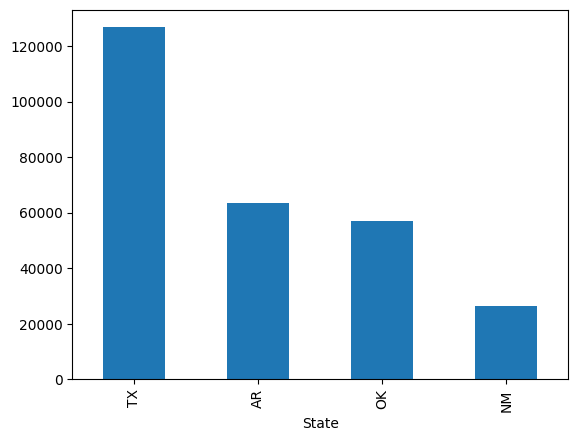

In [12]:
data["State"].value_counts().plot(kind="bar")

<Axes: xlabel='Incident Type'>

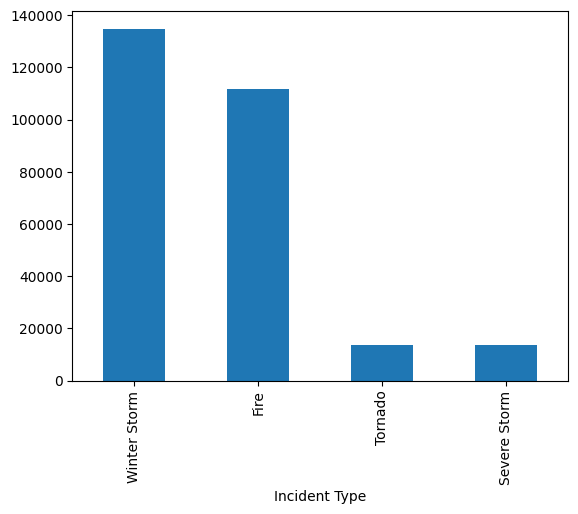

In [13]:
data["Incident Type"].value_counts().plot(kind="bar")

<Axes: xlabel='Construction Type'>

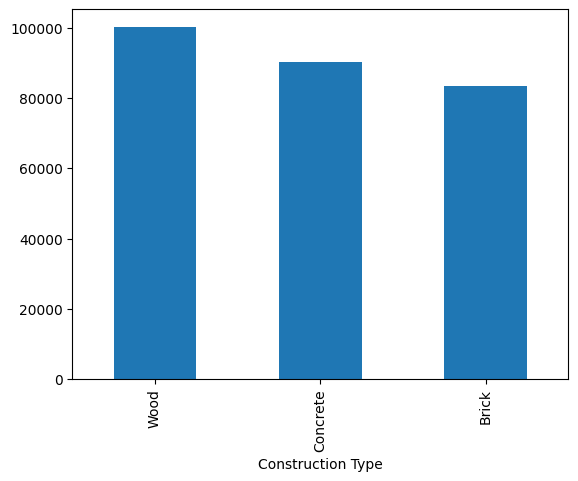

In [14]:
data["Construction Type"].value_counts().plot(kind="bar")

<Axes: xlabel='Baths'>

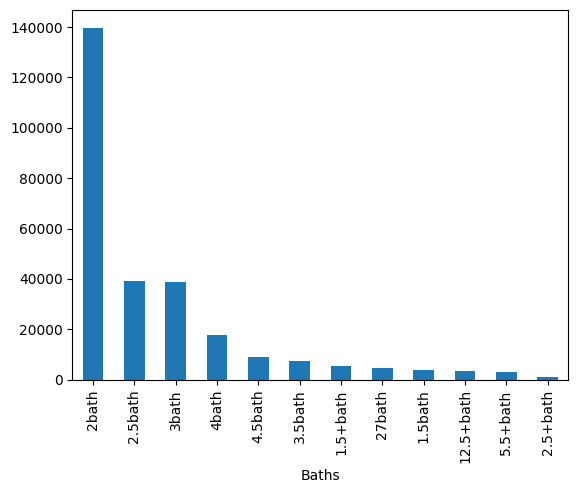

In [15]:
data["Baths"].value_counts().plot(kind="bar")

<Axes: xlabel='Beds'>

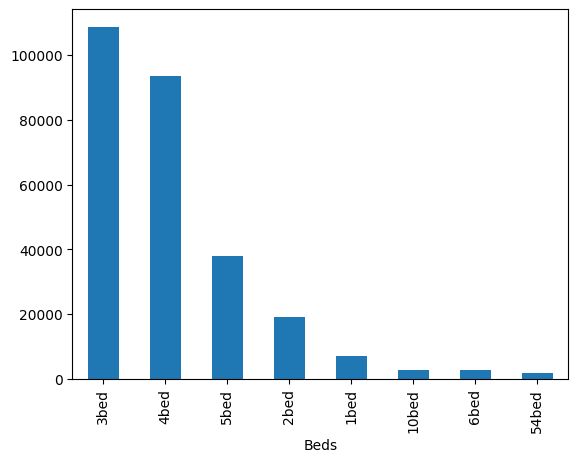

In [16]:
data["Beds"].value_counts().plot(kind="bar")

<Axes: ylabel='Frequency'>

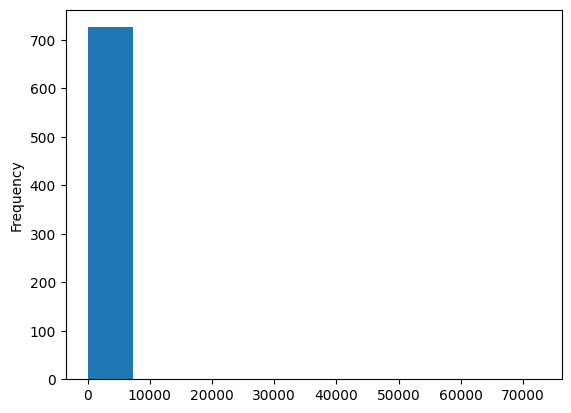

In [20]:
data["Average Premium"].value_counts().plot(kind="hist")